In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pprint import pprint
import os
import pickle

In [184]:
"""
Input the unique ID
"""
UNIQUE_ID = "3:3"

In [185]:
def load_data_from_file(filename):
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            return pickle.load(f)
    else:
        return None

In [186]:
def find_real_value(target, data):
    return [key for key, value in rc_data_index_map[target].items() if value == data][0]

In [187]:
train_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_train_combined_data_{UNIQUE_ID}.npy")
rc_data_index_map = load_data_from_file("/mdfsvc/SDMS/data/dict/RC_DATA_INDEX_MAP.pickle")[UNIQUE_ID]
pprint(rc_data_index_map)

{'code': {'IUJ4            ': 14,
          'IUK4            ': 16,
          'KRWJ4           ': 10,
          'KRWK4           ': 9,
          'KUJ4            ': 8,
          'KUK4            ': 11,
          'MUCJ4           ': 13,
          'MUCK4           ': 15,
          'MUCM4           ': 7,
          'UCJ4            ': 4,
          'UCK4            ': 3,
          'UCM4            ': 2,
          'UCM5            ': 5,
          'UCN4            ': 1,
          'UCU4            ': 6,
          'UCZ4            ': 12},
 'exnm': {'FSGX': 1},
 'type': {'DEPTH': 1, 'QUOTE': 2}}


In [188]:
# Define column names
columns = ["exnm", "code", "type", "T_class", "receive_count"]

# Convert train data to DataFrame
train_df = pd.DataFrame(train_data, columns=columns)

# Display train data
train_df.loc[train_df["code"] == 21]

,exnm,code,type,T_class,receive_count
22,1,21,1,708,6
49,1,21,1,709,30
107,1,21,1,7,5
151,1,21,1,8,4
177,1,21,1,10,5
246,1,21,1,12,2
271,1,21,1,13,2
343,1,21,1,15,6
437,1,21,1,18,4
509,1,21,1,20,1


In [189]:
anomaly_data_exists = True
try:
    anomaly_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_anomly_combined_data_{UNIQUE_ID}.npy")

    if anomaly_data.size <= 0:
        anomaly_data_exists = False
except FileNotFoundError:
    anomaly_data_exists = False

anomaly_data_exists

False

In [190]:
# Perform PCA(3D)
pca = PCA(n_components=3)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2", "Com3"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2,Com3
0,1.956957,0.778317,4.233369
1,2.185419,1.003816,4.225821
2,0.732088,0.162123,4.331480
3,0.836629,0.308987,4.332273
4,1.419153,0.759159,4.300892


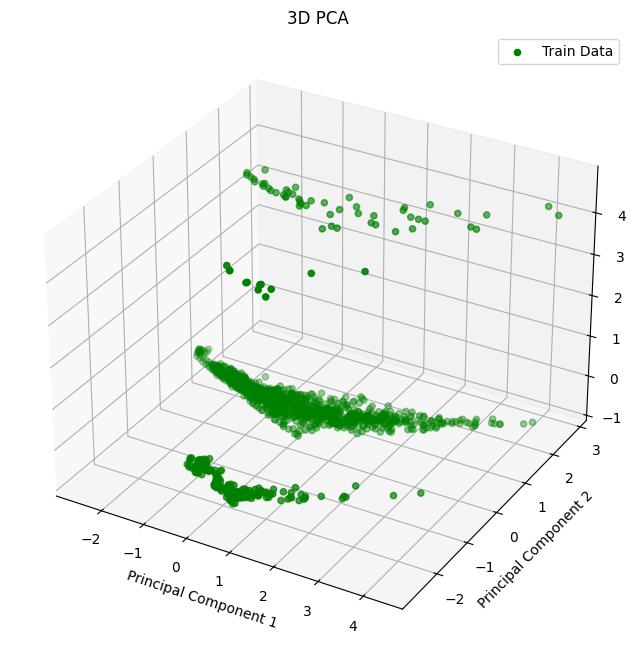

In [191]:
# Plot train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], zs=train_data_pca[:, 2], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    XX = scaler.fit_transform(anomaly_data)
    anomaly_data_pca = pca.transform(XX)
    ax.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], anomaly_data_pca[:, 2], c='red', marker='x', label='Anomaly Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')
plt.legend()
plt.show()

In [192]:
# Perform PCA(2D)
pca = PCA(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2
0,1.956957,0.778317
1,2.185419,1.003816
2,0.732088,0.162123
3,0.836629,0.308987
4,1.419153,0.759159


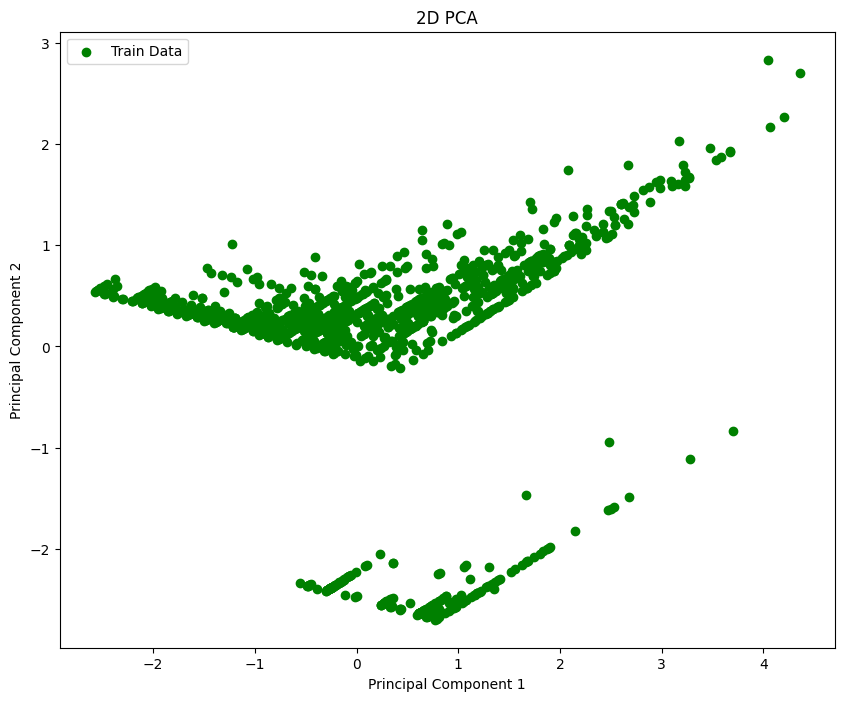

In [193]:
# Plot train data
plt.figure(figsize=(10, 8))
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    anomaly_data_pca = pca.transform(anomaly_data)
    plt.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], c='red', marker='x', label='Anomaly Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.legend()
plt.show()